In [12]:
# PyTorch 관련 버전 정보 확인

import torch



print("PyTorch 버전:", torch.__version__)
print("PyTorch 컴파일 CUDA 버전:", torch.version.cuda)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())
!nvcc --version



PyTorch 버전: 2.5.1
PyTorch 컴파일 CUDA 버전: 12.4
CUDA 사용 가능 여부: True


In [ ]:
!pip install -q plyfile

In [ ]:
!pip install -q submodules/diff-gaussian-rasterization

In [8]:
file_path = "submodules/simple-knn/simple_knn.cu"

with open(file_path, "r") as f:
    content = f.read()

if "#include <float.h>" not in content:
    new_content = "#include <float.h>\n" + content
    with open(file_path, "w") as f:
        f.write(new_content)
    print("파일에 '#include <float.h>'가 추가되었습니다.")
else:
    print("파일에 이미 '#include <float.h>'가 포함되어 있습니다.")


파일에 이미 '#include <float.h>'가 포함되어 있습니다.


In [ ]:
!pip install -e submodules/simple-knn/

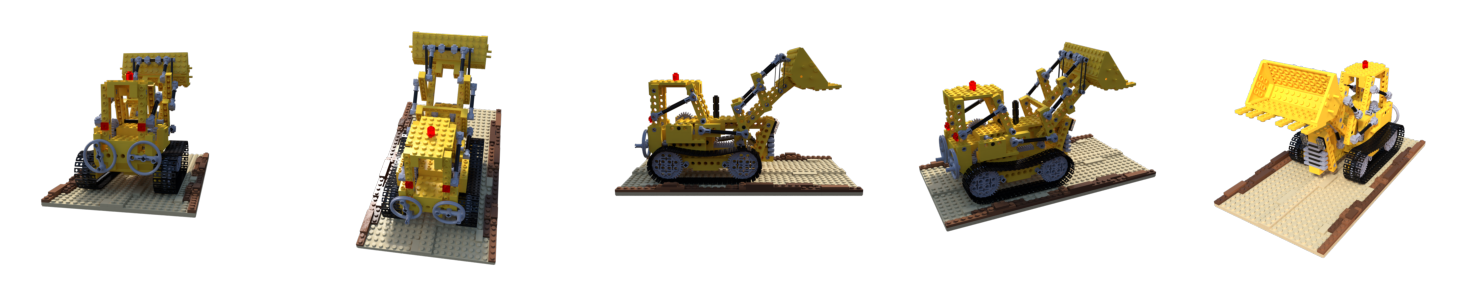

In [18]:
import matplotlib.pyplot as plt
import glob
import random

## 데이터셋 확인
image_paths = glob.glob("datas/lego/train/r_*.png")

selected_images = random.sample(image_paths, 5)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img_path in zip(axes, selected_images):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [25]:
# 모델 학습
!python train.py -s datas/lego --iterations 15000 -m output/lego --white_background --eval --save_iterations 3000 6000 15000

6354.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Optimizing output/lego
Output folder: output/lego [24/03 19:31:56]
Tensorboard not available: not logging progress [24/03 19:31:56]
Found transforms_train.json file, assuming Blender data set! [24/03 19:31:56]
Reading Training Transforms [24/03 19:31:56]
Reading Test Transforms [24/03 19:31:58]
Generating random point cloud (100000)... [24/03 19:32:03]
Loading Training Cameras [24/03 19:32:03]
Loading Test Cameras [24/03 19:32:04]
Number of points at initialisation :  100000 [24/03 19:32:07]
Training progress:  20%|▏| 3000/15000 [00:58<03:03, 65.37it/s, Loss=0.0233904, D
[ITER 3000] Saving Gaussians [24/03 19:33:06]
Training progress:  40%|▍| 6000/15000 [01:52<02:36, 57.47it/s, Loss=0.0161049, D
[ITER 6000] Saving Gaussians [24/03 19:34:01]
Training progress:  47%|▍| 7000/15000 [02:14<02:36, 51.26it/s, Loss=0.0151060, D
[ITER 7000] Evaluating test: L1 0.615044215619564 PSNR 2.6274766230583193 [24/03 19:34:22]

[ITER 7000] Evaluating train: L1 0.6069073200225831 PSNR 2.684866333007813 [

In [31]:
!python render.py --skip_train -m output/0c9ce094-0

13833.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Looking for config file in output/0c9ce094-0/cfg_args
Config file found: output/0c9ce094-0/cfg_args
Rendering output/0c9ce094-0
Loading trained model at iteration 30000 [24/03 21:36:36]
Reading camera 66/66 [24/03 21:36:36]
Loading Training Cameras [24/03 21:36:36]
Loading Test Cameras [24/03 21:36:38]
Rendering progress: 0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'output/0c9ce094-0/test/ours_15000/renders/00030.png'

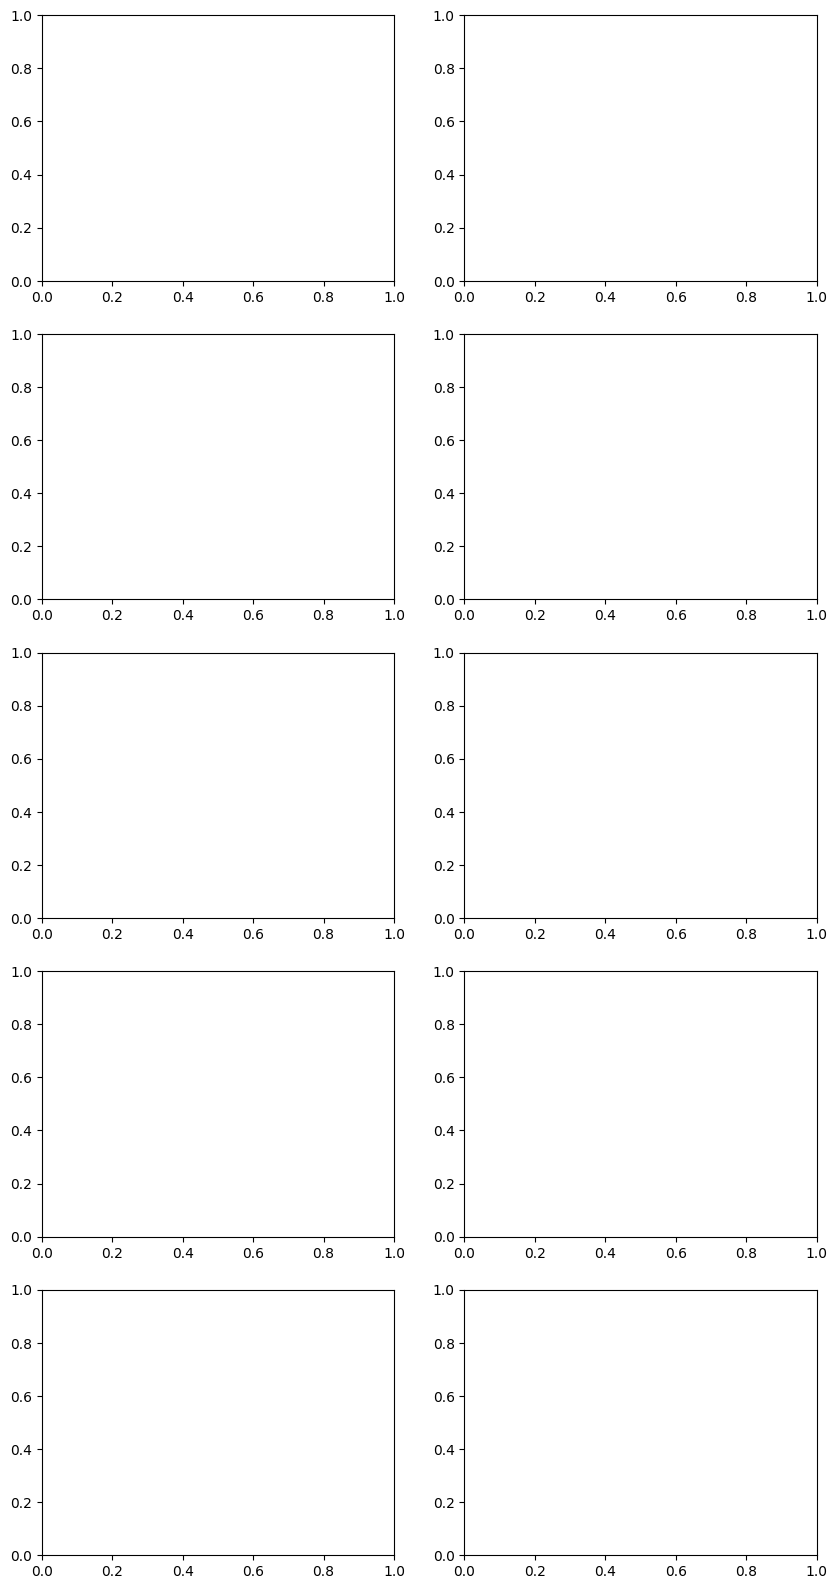

In [30]:
import matplotlib.pyplot as plt
import random

# 렌더링 뷰 시각화 (gt와 비교)
num_images = 200
n_samples = 5

indices = random.sample(range(num_images), n_samples)

fig, axes = plt.subplots(n_samples, 2, figsize=(10, 4 * n_samples))

for i, idx in enumerate(indices):
    file_name = f"{idx:05d}.png"

    gt_path = f"output/lego/test/ours_15000/gt/{file_name}"
    renders_path = f"output/0c9ce094-0/test/ours_15000/renders/{file_name}"

    gt_img = plt.imread(gt_path)
    renders_img = plt.imread(renders_path)

    axes[i, 0].imshow(gt_img)
    axes[i, 0].set_title(f"GT: {file_name}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(renders_img)
    axes[i, 1].set_title(f"Renders: {file_name}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()